In [34]:
%matplotlib inline

import matplotlib
import pandas as pd

from supplychainpy.model_inventory import analyse
from supplychainpy.model_demand import *
from supplychainpy.sample_data.config import ABS_FILE_PATH
from decimal import Decimal
raw_df =pd.read_csv(ABS_FILE_PATH['COMPLETE_CSV_XSM'])

In [35]:
analyse_kv =dict(
    df=raw_df, 
    start=1, 
    interval_length=12, 
    interval_type='months',
    z_value=Decimal(1.28), 
    reorder_cost=Decimal(400), 
    retail_price=Decimal(455), 
    file_type='csv',
    currency='USD'
)
analysis_df = analyse( **analyse_kv)
print(analysis_df[['sku', 'excess_stock', 'shortages', 'ABC_XYZ_Classification']])

         sku excess_stock shortages ABC_XYZ_Classification
0  KR202-209            0      5979                     AY
1  KR202-210            0         0                     BY
2  KR202-211            0      7109                     CY
3  KR202-212            0      7769                     CY
4  KR202-213            0         0                     CY
5  KR202-214            0      5834                     BY
6  KR202-215          732         0                     AY
7  KR202-216            0      7009                     AY
8  KR202-217            0      7255                     AY


In [36]:
analysis_rev = analysis_df[['sku', 'revenue']]
print(analysis_rev.sort_values(by='revenue', ascending=True))

         sku    revenue
8  KR202-217  108480711
0  KR202-209  123190000
2  KR202-211   19688400
3  KR202-212     207330
4  KR202-213   24976000
1  KR202-210   25524200
5  KR202-214   34434000
6  KR202-215   39747500
7  KR202-216   53917641


In [37]:
row_ds = raw_df[raw_df['Sku']=='KR202-212'].squeeze()
print(row_ds[1:12])

jan     104
feb    2262
mar     350
apr     528
may    2570
jun    1216
jul    1101
aug    2755
sep    2856
oct    2381
nov    1867
Name: 3, dtype: object


In [109]:
ses_df = simple_exponential_smoothing_forecast(ds=row_ds[1:12], length=12, smoothing_level_constant=0.5)
print(ses_df)


{'forecast_breakdown': [{'alpha': 0.5, 't': 1, 'demand': 104, 'level_estimates': 869.7272727272727, 'one_step_forecast': 1635.4545454545455, 'forecast_error': -1531.4545454545455, 'squared_error': 2345353.024793389}, {'alpha': 0.5, 't': 2, 'demand': 2262, 'level_estimates': 1565.8636363636365, 'one_step_forecast': 869.7272727272727, 'forecast_error': 1392.2727272727273, 'squared_error': 1938423.347107438}, {'alpha': 0.5, 't': 3, 'demand': 350, 'level_estimates': 957.9318181818182, 'one_step_forecast': 1565.8636363636365, 'forecast_error': -1215.8636363636365, 'squared_error': 1478324.3822314052}, {'alpha': 0.5, 't': 4, 'demand': 528, 'level_estimates': 742.9659090909091, 'one_step_forecast': 957.9318181818182, 'forecast_error': -429.93181818181824, 'squared_error': 184841.36828512402}, {'alpha': 0.5, 't': 5, 'demand': 2570, 'level_estimates': 1656.4829545454545, 'one_step_forecast': 742.9659090909091, 'forecast_error': 1827.034090909091, 'squared_error': 3338053.5693440083}, {'alpha': 

In [39]:
forecast_breakdown_df = pd.DataFrame(ses_df.get('forecast_breakdown', 'UNKNOWN'))
print(forecast_breakdown_df)

    alpha  demand  forecast_error  level_estimates  one_step_forecast  \
0     0.5     104    -1531.454545       869.727273        1635.454545   
1     0.5    2262     1392.272727      1565.863636         869.727273   
2     0.5     350    -1215.863636       957.931818        1565.863636   
3     0.5     528     -429.931818       742.965909         957.931818   
4     0.5    2570     1827.034091      1656.482955         742.965909   
5     0.5    1216     -440.482955      1436.241477        1656.482955   
6     0.5    1101     -335.241477      1268.620739        1436.241477   
7     0.5    2755     1486.379261      2011.810369        1268.620739   
8     0.5    2856      844.189631      2433.905185        2011.810369   
9     0.5    2381      -52.905185      2407.452592        2433.905185   
10    0.5    1867     -540.452592      2137.226296        2407.452592   

    squared_error   t  
0    2.345353e+06   1  
1    1.938423e+06   2  
2    1.478324e+06   3  
3    1.848414e+05   4  
4  

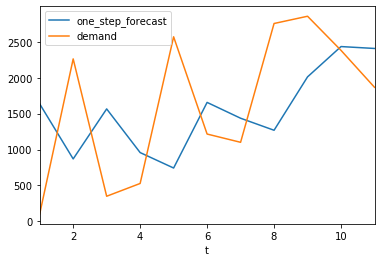

In [40]:
forecast_breakdown_df.plot(x='t', y=['one_step_forecast','demand'])

In [41]:
regression = {'regression': [(ses_df.get('statistics')['slope']* i ) + ses_df.get('statistics')['intercept'] for i in range(1,12)]}
print(regression)

{'regression': [602.090909090909, 826.5818181818181, 1051.0727272727272, 1275.5636363636363, 1500.0545454545454, 1724.5454545454545, 1949.0363636363636, 2173.5272727272727, 2398.018181818182, 2622.509090909091, 2847.0]}


In [19]:
analyse_kv =dict(
    file_path=ABS_FILE_PATH['COMPLETE_CSV_XSM'], 
    start=1, 
    interval_length=12, 
    interval_type='months',
    z_value=Decimal(1.28), 
    reorder_cost=Decimal(400), 
    retail_price=Decimal(455), 
    file_type='csv',
    currency='USD'
)
analysis = analyse(**analyse_kv)
analysis_summary = [ i.orders_summary()for i in analysis]
KR202_209_details = [demand for demand in analysis_summary if demand.get('sku')== 'KR202-209']
print(KR202_209_details[0].get('orders').get('demand'))

('1509', '1855', '2665', '1841', '1231', '2598', '1988', '1988', '2927', '2707', '731', '2598')


In [32]:
ses_df = simple_exponential_smoothing_forecast(demand=KR202_209_details[0].get('orders').get('demand'), length=12, smoothing_level_constant=0.5)
#print(ses_df)
forecast_breakdown_df = pd.DataFrame(ses_df.get('forecast_breakdown', 'UNKNOWN'))
print(forecast_breakdown_df)



    alpha  demand  forecast_error  level_estimates  one_step_forecast  \
0     0.5    1509     -544.166667      1781.083333        2053.166667   
1     0.5    1855       73.916667      1818.041667        1781.083333   
2     0.5    2665      846.958333      2241.520833        1818.041667   
3     0.5    1841     -400.520833      2041.260417        2241.520833   
4     0.5    1231     -810.260417      1636.130208        2041.260417   
5     0.5    2598      961.869792      2117.065104        1636.130208   
6     0.5    1988     -129.065104      2052.532552        2117.065104   
7     0.5    1988      -64.532552      2020.266276        2052.532552   
8     0.5    2927      906.733724      2473.633138        2020.266276   
9     0.5    2707      233.366862      2590.316569        2473.633138   
10    0.5     731    -1859.316569      1660.658285        2590.316569   
11    0.5    2598      937.341715      2129.329142        1660.658285   

    squared_error   t  
0    2.961174e+05   1  
1 

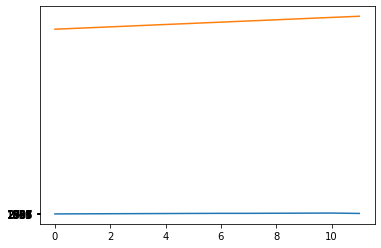

In [21]:
FF = ses_df.get('forecast')
regression = ses_df.get('regression')
demand = KR202_209_details[0].get('orders').get('demand')
plt.plot(range(12), demand)
plt.plot(range(12), regression)
plt.show()

In [30]:
from supplychainpy.inventory.summarise import Inventory
filtered_summary = Inventory(analysis)
sku_summary = [summary for summary in filtered_summary.describe_sku('KR202-209')]
#print(sku_summary)
df = pd.DataFrame(data=sku_summary)
df

,average_orders,classification,excess_cost,excess_rank,excess_units,gross_profit_margin,inventory_traffic_light,inventory_turns,markup_percentage,max_order,...,revenue_rank,safety_stock_cost,safety_stock_rank,safety_stock_units,shortage_cost,shortage_rank,shortage_units,sku_id,unit_cost,unit_cost_rank
0,2053,AY,0,2,0,3999,green,24.564307,3.9950050,2927,...,1,1166373.9,3,1165,5984979,1,5979,KR202-209,1001,1
